In [134]:
import csv
from itertools import *
import pandas as pd
import re
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')

In [20]:
allTraffic = pd.read_csv('traffic2015_all.csv')
regularTraffic = pd.read_csv('traffic2015_regular.csv')
truckTraffic = pd.read_csv('traffic2015_trucks.csv')

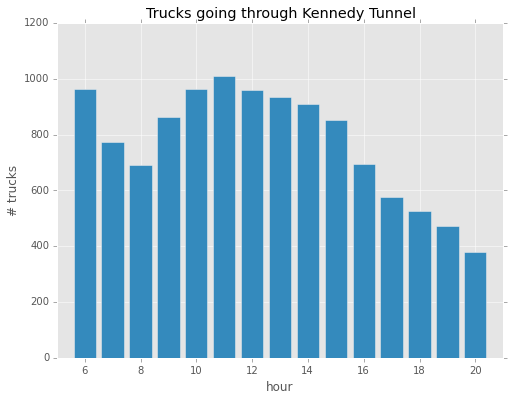

In [214]:
thisTraffic = truckTraffic
roads = thisTraffic['Weg/knoop']
segments = thisTraffic['Segment']
some = thisTraffic[(thisTraffic['Segment'] == 'van Antwerpen-Centrum tot Linkeroever richting Ring 1 (Kennedytunnel)')]
some = some[some['Uur'] >= 6]
some = some[some['Uur'] <= 20]
meanTrafficPerHour = some.drop('Jaar', axis=1).groupby(('Uur')).mean().drop('Maand', axis=1)
truckTrafficPerHour = meanTrafficPerHour

fig = plt.figure(figsize=(8,6))
plt.bar(meanTrafficPerHour.index, meanTrafficPerHour['Aantal voertuigen'], align='center')
plt.xlim([5, 21])
#plt.ylim([2000, 5000])
plt.title('Trucks going through Kennedy Tunnel')
plt.ylabel('# trucks')
plt.xlabel('hour')

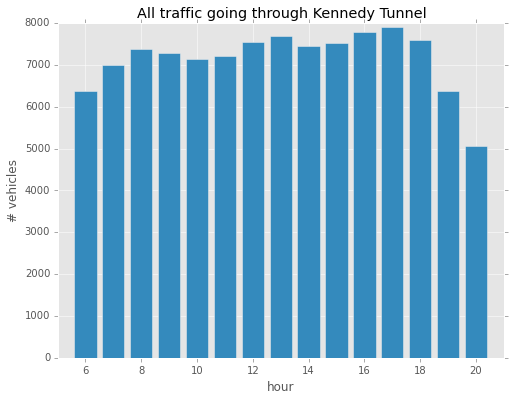

In [209]:
thisTraffic = allTraffic
roads = thisTraffic['Weg/knoop']
segments = thisTraffic['Segment']
some = thisTraffic[(thisTraffic['Segment'] == 'van Antwerpen-Centrum tot Linkeroever richting Ring 1 (Kennedytunnel)')]
some = some[some['Uur'] >= 6]
some = some[some['Uur'] <= 20]
meanTrafficPerHour = some.drop('Jaar', axis=1).groupby(('Uur')).mean().drop('Maand', axis=1)

fig = plt.figure(figsize=(8,6))
plt.bar(meanTrafficPerHour.index, meanTrafficPerHour['Aantal voertuigen'], align='center')
plt.xlim([5, 21])
#plt.ylim([2000, 5000])
plt.title('Trucks going through Kennedy Tunnel')
plt.ylabel('# trucks')
plt.xlabel('hour')

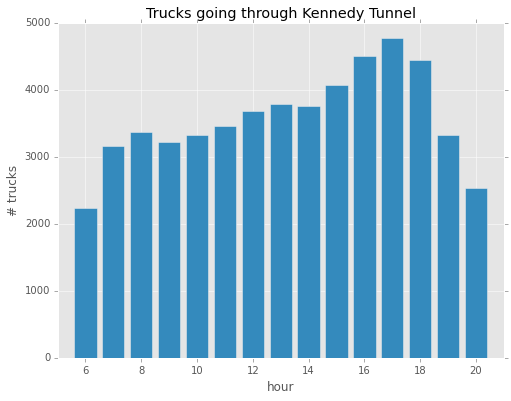

In [193]:
thisTraffic = regularTraffic
roads = thisTraffic['Weg/knoop']
segments = thisTraffic['Segment']
some = thisTraffic[(thisTraffic['Segment'] == 'van Antwerpen-Centrum tot Linkeroever richting Ring 1 (Kennedytunnel)')]
some = some[some['Uur'] >= 6]
some = some[some['Uur'] <= 20]
meanTrafficPerHour = some.drop('Jaar', axis=1).groupby(('Uur')).mean().drop('Maand', axis=1)
regularTrafficPerHour = meanTrafficPerHour

fig = plt.figure(figsize=(8,6))
plt.bar(meanTrafficPerHour.index, meanTrafficPerHour['Aantal voertuigen'], align='center')
plt.xlim([5, 21])
#plt.ylim([2000, 5000])
plt.title('Trucks going through Kennedy Tunnel')
plt.ylabel('# trucks')
plt.xlabel('hour')

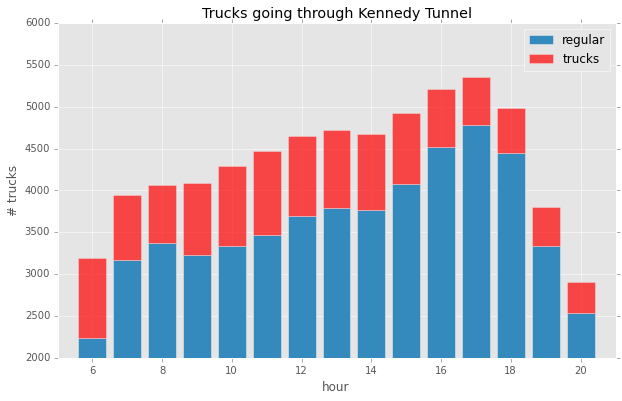

In [211]:
fig = plt.figure(figsize=(10,6))
plt.bar(meanTrafficPerHour.index, regularTrafficPerHour['Aantal voertuigen'], align='center', label='regular')
plt.bar(meanTrafficPerHour.index, truckTrafficPerHour['Aantal voertuigen'],
        bottom=regularTrafficPerHour['Aantal voertuigen'], align='center', color=(1, 0, 0), alpha=0.7,
       label='trucks')
plt.xlim([5, 21])
plt.ylim([2000, 6000])
plt.title('Trucks going through Kennedy Tunnel')
plt.ylabel('# trucks')
plt.xlabel('hour')
plt.legend()

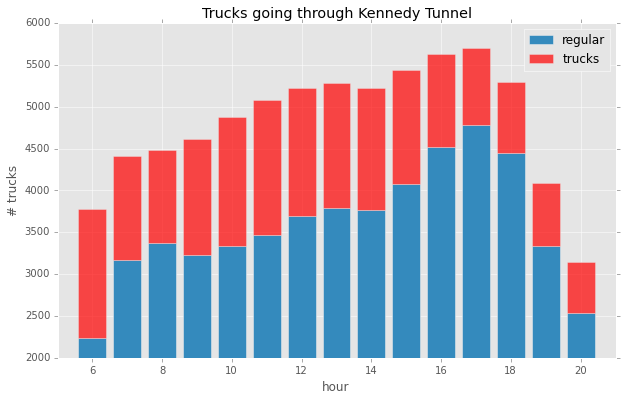

In [208]:
fig = plt.figure(figsize=(10,6))
plt.bar(meanTrafficPerHour.index, regularTrafficPerHour['Aantal voertuigen'], align='center', label='regular')
plt.bar(meanTrafficPerHour.index, truckTrafficPerHour['Aantal voertuigen'] * 1.6,
        bottom=regularTrafficPerHour['Aantal voertuigen'], align='center', color=(1, 0, 0), alpha=0.7,
       label='trucks')
plt.xlim([5, 21])
plt.ylim([2000, 6000])
plt.title('Trucks going through Kennedy Tunnel')
plt.ylabel('# trucks')
plt.xlabel('hour')
plt.legend()

In [133]:
bits = list(enumerate(filter(lambda x: 'Ring 1' in x, segments.unique())))
bits = map(lambda x: x[1], filter(lambda x: x[0] in [7, 11, 2, 3, 6], bits))